In [140]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [141]:
df=pd.read_csv('/kaggle/input/iris/Iris.csv')

In [142]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [143]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [144]:
import warnings
warnings.filterwarnings('ignore')

In [145]:
features=['SepalLengthCm', 'PetalLengthCm']
X=df[features]

In [146]:
X

,SepalLengthCm,PetalLengthCm
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [147]:
from sklearn.preprocessing import StandardScaler
X_standardized=StandardScaler().fit_transform(X)

In [148]:
X_standardized

array([[-0.90068117, -1.3412724 ],
       [-1.14301691, -1.3412724 ],
       [-1.38535265, -1.39813811],
       [-1.50652052, -1.2844067 ],
       [-1.02184904, -1.3412724 ],
       [-0.53717756, -1.17067529],
       [-1.50652052, -1.3412724 ],
       [-1.02184904, -1.2844067 ],
       [-1.74885626, -1.3412724 ],
       [-1.14301691, -1.2844067 ],
       [-0.53717756, -1.2844067 ],
       [-1.26418478, -1.227541  ],
       [-1.26418478, -1.3412724 ],
       [-1.87002413, -1.51186952],
       [-0.05250608, -1.45500381],
       [-0.17367395, -1.2844067 ],
       [-0.53717756, -1.39813811],
       [-0.90068117, -1.3412724 ],
       [-0.17367395, -1.17067529],
       [-0.90068117, -1.2844067 ],
       [-0.53717756, -1.17067529],
       [-0.90068117, -1.2844067 ],
       [-1.50652052, -1.56873522],
       [-0.90068117, -1.17067529],
       [-1.26418478, -1.05694388],
       [-1.02184904, -1.227541  ],
       [-1.02184904, -1.227541  ],
       [-0.7795133 , -1.2844067 ],
       [-0.7795133 ,

In [149]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.5,min_samples=5)
clusters=dbscan.fit_predict(X_standardized)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [150]:
centroids=pd.DataFrame(X_standardized).groupby(clusters).mean().values

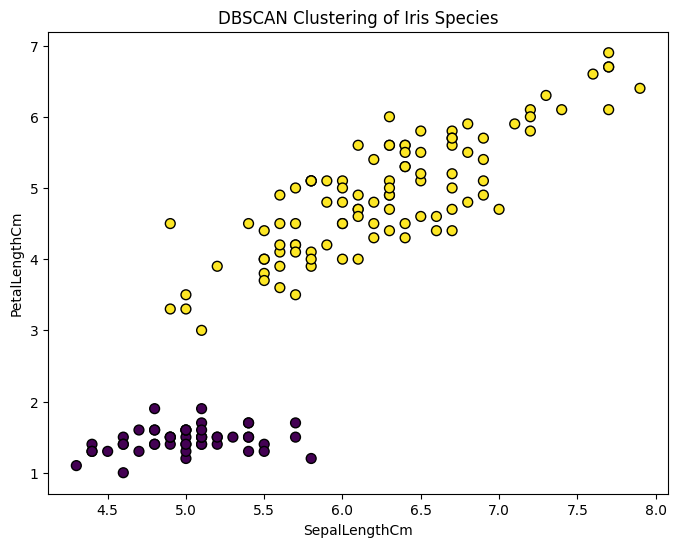

In [151]:
plt.figure(figsize=(8, 6))
plt.scatter(X['SepalLengthCm'], X['PetalLengthCm'], c=clusters, cmap='viridis', edgecolors='black', s=50)
plt.title('DBSCAN Clustering of Iris Species')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.show()

In [152]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(X_standardized)
  wcss.append(kmeans.inertia_)

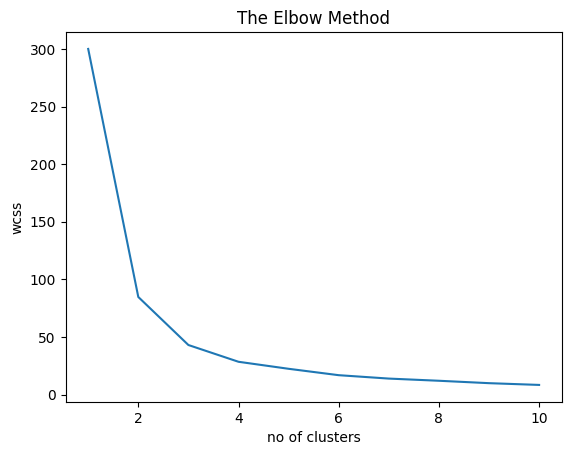

In [153]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [154]:
kmeansmodel=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeansmodel.fit_predict(X_standardized)

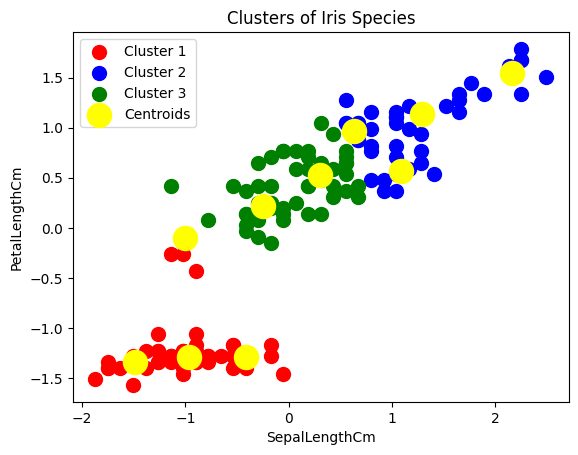

In [155]:
plt.scatter(X_standardized[y_kmeans == 0, 0], X_standardized[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_standardized[y_kmeans == 1, 0], X_standardized[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_standardized[y_kmeans == 2, 0], X_standardized[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Iris Species')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend()
plt.show()